Harryson Steven Baquero Castro

Regresión Lineal

Vehicle dataset

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Instlamos bibliotecas, cargamos los datasets, renombramos y filtramos las columnas de los datasets, por ultimo unimos los datasets en uno solo con las columnas más importantes para realizar una regresión lineal

In [81]:
pip install numpy pandas scikit-learn matplotlib

In [82]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Cargar los datasets
dataset1 = pd.read_csv('./car_data.csv')
dataset2 = pd.read_csv('./CAR_DETAILS_FROM_CAR_DEKHO.csv')
dataset3 = pd.read_csv('./Car_details_v3.csv')
dataset4 = pd.read_csv('./car_details_v4.csv')

In [84]:
# Mostrar las primeras filas de cada dataset para examinar su estructura
dataset1_head = dataset1.head()
dataset2_head = dataset2.head()
dataset3_head = dataset3.head()
dataset4_head = dataset4.head()

In [85]:
dataset1_head, dataset2_head, dataset3_head, dataset4_head

(  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Seller_Type Transmission  Owner  
 0      Dealer       Manual      0  
 1      Dealer       Manual      0  
 2      Dealer       Manual      0  
 3      Dealer       Manual      0  
 4      Dealer       Manual      0  ,
                        name  year  selling_price  km_driven    fuel  \
 0             Maruti 800 AC  2007          60000      70000  Petrol   
 1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
 2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
 3    Datsun RediGO T Option  2017         250000

In [86]:
# Revisamos dataset por dataset
dataset4.head(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [93]:
# Renombrar columnas para estandarizar nombres comunes
dataset1.columns = ['name', 'year', 'selling_price', 'present_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']
dataset2.columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']
dataset3.columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [95]:
# Renombrar solo las columnas necesarias en dataset4
dataset4 = dataset4.rename(columns={
    'Make': 'name', 'Year': 'year', 'Price': 'selling_price', 'Kilometer': 'km_driven', 
    'Fuel Type': 'fuel_type', 'Seller Type': 'seller_type', 'Transmission': 'transmission', 'Owner': 'owner'
})

In [97]:
# Seleccionar solo las columnas necesarias para el análisis en cada dataset
columns_to_keep = ['year', 'selling_price', 'km_driven']
dataset1 = dataset1[columns_to_keep]
dataset2 = dataset2[columns_to_keep]
dataset3 = dataset3[columns_to_keep]
dataset4 = dataset4[columns_to_keep]

In [99]:
# Combinar los datasets
combined_data = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)

In [101]:
# Mostrar las primeras filas del dataset combinado
print(combined_data.head())

   year  selling_price  km_driven
0  2014           3.35      27000
1  2013           4.75      43000
2  2017           7.25       6900
3  2011           2.85       5200
4  2014           4.60      42450


In [103]:
# Descripción de los datos
combined_data.describe()

,year,selling_price,km_driven
count,14828.000000,1.482800e+04,1.482800e+04
mean,2013.955692,7.338985e+05,6.593197e+04
std,4.121330,1.195352e+06,5.404873e+04
min,1983.000000,1.000000e-01,0.000000e+00
25%,2012.000000,2.500000e+05,3.200000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,7.150000e+05,9.000000e+04
max,2022.000000,3.500000e+07,2.360457e+06


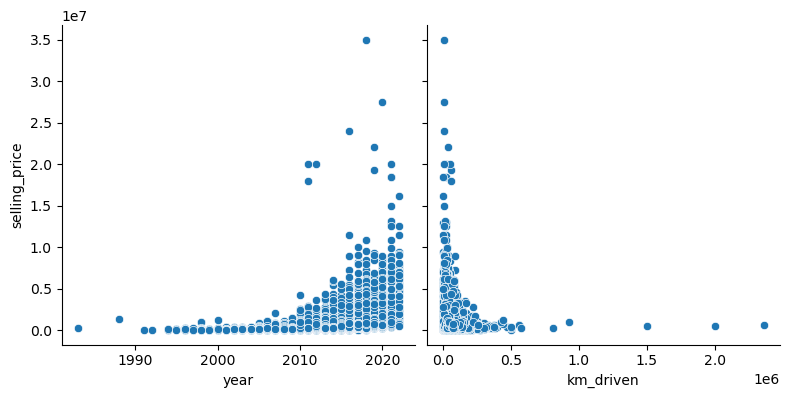

                   year  selling_price  km_driven
year           1.000000       0.363484  -0.403591
selling_price  0.363484       1.000000  -0.176874
km_driven     -0.403591      -0.176874   1.000000


In [105]:
# Gráficos de dispersión
sns.pairplot(combined_data, x_vars=['year', 'km_driven'], y_vars='selling_price', height=4, aspect=1, kind='scatter')
plt.show()

# Correlación entre variables
print(combined_data.corr())

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Hacemos el proceso de ETL para todos los datos, analizando mediante gráficas y realizando el debido proceso para cada caso

In [108]:
# Eliminación de valores faltantes
combined_data.dropna(inplace=True)

In [110]:
#Identificación de Datos Faltantes y Atípicos

# Verificar datos faltantes en cada columna
missing_data = combined_data.isnull().sum()
print("Datos faltantes por columna:\n", missing_data)

Datos faltantes por columna:
 year             0
selling_price    0
km_driven        0
dtype: int64


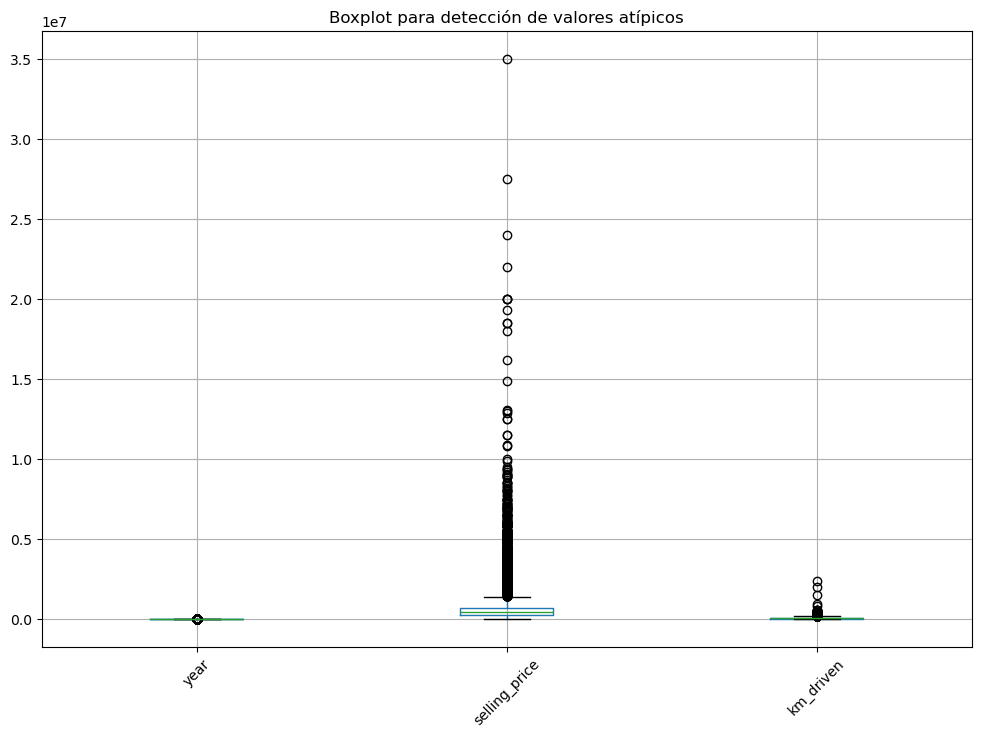

In [112]:
# Boxplot de columnas numéricas
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
combined_data[numeric_columns].boxplot()
plt.title("Boxplot para detección de valores atípicos")
plt.xticks(rotation=45)
plt.show()

In [114]:
#Conteo de Datos Atípicos (precio de venta)

nivel_minimo=0
nivel_maximo=2000000
Total_Atipicos=((combined_data['selling_price']<nivel_minimo)|(combined_data['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 939


In [118]:
#Conteo de Datos Atípicos (kilometraje)

nivel_minimo_km=0
nivel_maximo_km=100000
Total_Atipicos_km=((combined_data['km_driven']<nivel_minimo_km)|(combined_data['km_driven']>nivel_maximo_km)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos_km))

El total de datos atípicos es 2530


In [120]:
# Número de filas y columnas para reviar si podemos eliminar los datos atípicos
num_rows, num_columns = combined_data.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_columns}")

Número de filas: 14828
Número de columnas: 3


In [122]:
# Filtra Datos Atípicos ventas
combined_data=combined_data[(combined_data['selling_price']<nivel_maximo)&(combined_data['selling_price']>nivel_minimo)]

In [124]:
# Filtra Datos Atípicos kilometraje
combined_data=combined_data[(combined_data['km_driven']<nivel_maximo_km)&(combined_data['km_driven']>nivel_minimo_km)]

In [126]:
# Comprobamos si se eliminaron los datos atípicos
Total_Atipicos=((combined_data['selling_price']<nivel_minimo)|(combined_data['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


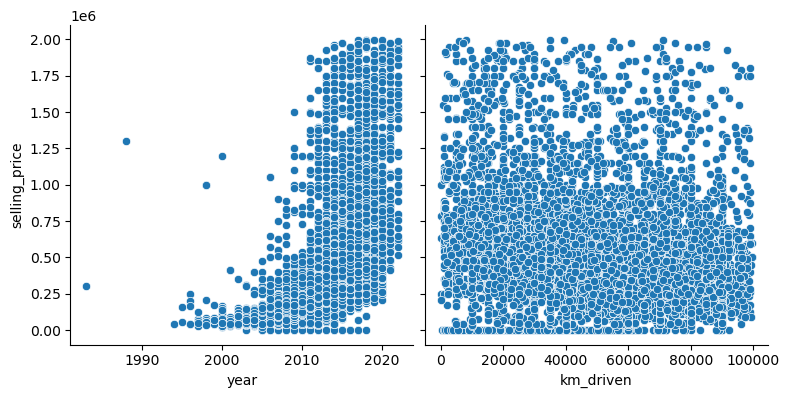

                   year  selling_price  km_driven
year           1.000000       0.533689  -0.464682
selling_price  0.533689       1.000000  -0.186592
km_driven     -0.464682      -0.186592   1.000000


In [128]:
# Gráficos de dispersión
sns.pairplot(combined_data, x_vars=['year', 'km_driven'], y_vars='selling_price', height=4, aspect=1, kind='scatter')
plt.show()

# Correlación entre variables
print(combined_data.corr())

In [130]:
#Revisión del tipo de datos y datos faltantes

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 0 to 14827
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10810 non-null  int64  
 1   selling_price  10810 non-null  float64
 2   km_driven      10810 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 337.8 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Utilizamos datos relevantes para el aprendizaje del algoritmo

In [132]:
# Mostrar las primeras filas del dataset combinado
print(combined_data.head())

   year  selling_price  km_driven
0  2014           3.35      27000
1  2013           4.75      43000
2  2017           7.25       6900
3  2011           2.85       5200
4  2014           4.60      42450


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

Seleccionamos las variables 

In [ ]:
# Variables independientes y dependiente
X = combined_data[['year', 'km_driven']] #Variables independientes
y = combined_data['selling_price'] #Vvariable dependiente

5. Entrenar el modelo configurando los diferentes hiperparámetros.

Realizamos el test y train del modelo

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones
predicciones = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error cuadrático medio: {mse}")
print(f"R²: {r2}")

Error cuadrático medio: 94875149039.5712
R²: 0.287650933153591


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

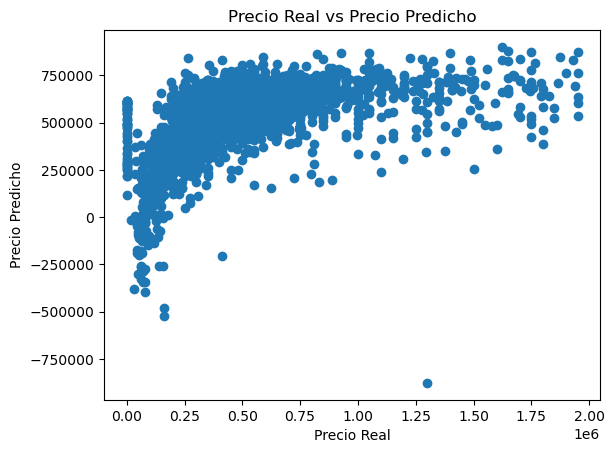

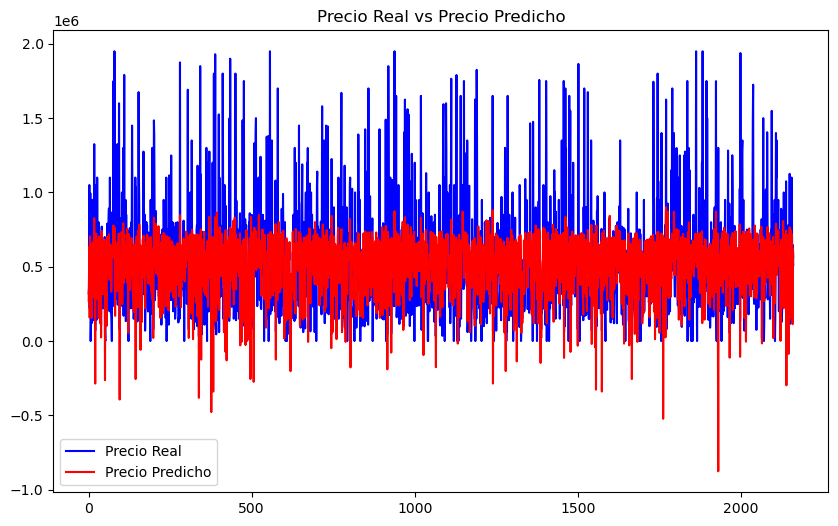

In [144]:
plt.scatter(y_test, predicciones)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.show()

# Graficar la línea de regresión (opcional)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Precio Real', color='blue')
plt.plot(predicciones, label='Precio Predicho', color='red')
plt.title('Precio Real vs Precio Predicho')
plt.legend()
plt.show()

In [160]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2019, 20000], [2017, 20000]])  # Nuevos valores (Tamaño, Habitaciones)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año: {nuevo_X[i][0]} , Kilometraje: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Año: 2019 , Kilometraje: 20000): 730805.13 USD
Predicción 2 para (Año: 2017 , Kilometraje: 20000): 623275.12 USD


C:\Users\harry\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8. Interpretar, analizar y documentar los resultados obtenidos.

    Rendimiento del modelo: 
Error cuadrático medio: 94875149039.5712:
Aunque el MSE parece alto, esto se debe a las unidades del precio de venta de autos. Un MSE así puede ser útil para identificar tendencias generales, incluso si no predice valores exactos. En este caso de estudio, nos ayuda a evaluar el precio de un vehiculo dependiendo del año y kilometraje

R²: 0.287650933153591: 
El modelo explica el 28.7% de la variabilidad en los precios, un buen punto de partida. Esto sugiere que el precio depende también de otros factores.1

    Predicciones:
Predicción 1 para (Año: 2019 , Kilometraje: 20000): 730805.13 USD
Predicción 2 para (Año: 2017 , Kilometraje: 20000): 623275.12 USD

El modelo de regresión lineal múltiple responde correctamente al caso que se le proponga, en este ejemplo, tenemos un vehiculo con la misma cantidad de kilometraje, pero diferente año de fabricación, por lo tanto el precio del vehiculo más reciente debe ser mayor comparado al vehiculo antiguo, aunque cuenten con el mismo kilometraje.
Como podemos evidenciar, el precio predicho es mayor para el automovil más nuevo

    Graficos:
1. Gráfico de dispersión entre variables (kilometraje y año X precio): Ayudó a revisar datos atípicos y la relación que hay entre las variables
2. Boxplot: Permitió la visualización de valores atípicos en cada columna
3. Segundo gráfico de dispersión entre variables (kilometraje y año X precio): Luego de realizar el proceso ETL, revisamos para cada columna que siga habiendo relación entre las variables y que los datos atípicos se hayan suprimido
4. Linea de regresión del modelo de aprendizaje: Evidencia la capacidad de análisis y aprendizaje que ha generado el modelo con base en el algoritmo proporcionado